In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def line_limits(s1, e1, s2, e2):
    print(s1, e1, s2, e2)
    e1 -= s1
    s2 -= s1
    e2 -= s1
    if s2 < 0:
        s2 += 2 * np.pi
    if e1 < 0:
        e1 += 2 * np.pi
    if e2 < 0:
        e2 += 2 * np.pi
    print(0, e1*180/np.pi, s2*180/np.pi, e2*180/np.pi)
    start = max(e2 - np.pi, e1)
    end = min(s2, np.pi)
    return start + s1, end + s1


In [20]:

first = np.pi*np.random.rand(1)
second = np.sort(np.pi + np.pi*np.random.rand(2))
points = np.array([0,first[0],second[0],second[1]])
# print(points)
angles_line = np.array(line_limits(0,first[0],second[0],second[1]))
print(angles_line)

0 0.27558118877077853 3.8469234032112305 4.646302095996776
0 15.789639029763643 220.41247511410694 266.2135004434036
[1.50470944 3.14159265]


In [8]:
def plot_unit_circle(angles=None):
    """
    Plot points on a unit circle given an array of angles in radians.
    If no angles are provided, generates some example angles.
    """
    # If no angles provided, create some example angles
    if angles is None:
        angles = np.linspace(0, 2*np.pi, 12, endpoint=False)  # 12 equally spaced points
    
    # Convert angles to Cartesian coordinates
    x = np.cos(angles)
    y = np.sin(angles)
    
    # Create the plot
    plt.figure(figsize=(8, 8))
    
    # Plot the unit circle
    circle_angles = np.linspace(0, 2*np.pi, 100)
    circle_x = np.cos(circle_angles)
    circle_y = np.sin(circle_angles)
    plt.plot(circle_x, circle_y, 'b-', alpha=0.3, label='Unit Circle')
    
    # Plot the points
    plt.scatter(x, y, c='red', s=100, zorder=5, label='Points')
    
    # Add labels for each point
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.annotate(f'{angles[i]:.2f}', (xi, yi), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8)
    
    # Set equal aspect ratio and limits
    plt.axis('equal')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    
    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', alpha=0.3)
    plt.axvline(x=0, color='k', alpha=0.3)
    plt.title('Points on Unit Circle')
    plt.xlabel('x = cos(θ)')
    plt.ylabel('y = sin(θ)')
    plt.legend()
    
    plt.show()
    
    return x, y

In [22]:

def draw_circular_arcs_parametric(points, angles_line):
    """
    Alternative method using parametric equations to draw arcs
    """
    angles = np.array(points)
    x_points = np.cos(angles)
    y_points = np.sin(angles)
    
    plt.figure(figsize=(10, 10))
    
    # Plot unit circle
    circle_angles = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(circle_angles), np.sin(circle_angles), 'k-', alpha=0.2, linewidth=2)
    
    # Plot points
    colors = ['red', 'blue', 'green', 'orange']
    for i, (xi, yi) in enumerate(zip(x_points, y_points)):
        plt.scatter(xi, yi, c=colors[i], s=150, zorder=5)
    
    # Function to create arc using parametric equations
    def create_parametric_arc(angle1, angle2, color, num_points=50):
        """Create arc using parametric equations"""
        # Determine direction (counterclockwise)
        diff = (angle2 - angle1) % (2*np.pi)
        if diff > np.pi:
            # Go the other way around for smaller arc
            arc_angles = np.linspace(angle1, angle2 - 2*np.pi, num_points)
        else:
            arc_angles = np.linspace(angle1, angle2, num_points)
        
        x_arc = np.cos(arc_angles)
        y_arc = np.sin(arc_angles)
        
        plt.plot(x_arc, y_arc, color=color, linewidth=3, alpha=0.8)
    
    # Draw arcs using parametric method
    create_parametric_arc(angles[0], angles[1], 'red')
    create_parametric_arc(angles[2], angles[3], 'green')
    create_parametric_arc(angles_line[0], angles_line[1], 'blue')
    plt.axis('equal')
    plt.xlim(-1.3, 1.3)
    plt.ylim(-1.3, 1.3)
    plt.grid(True, alpha=0.3)
    plt.title('Circular Arcs (Parametric Method)')
    plt.show()

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


0.0 0.6871529094903912 1.6314484928095192 4.118556030211375
0 39.37096159393447 93.47511313096467 235.97587821926655
[55.97587822 93.47511313]


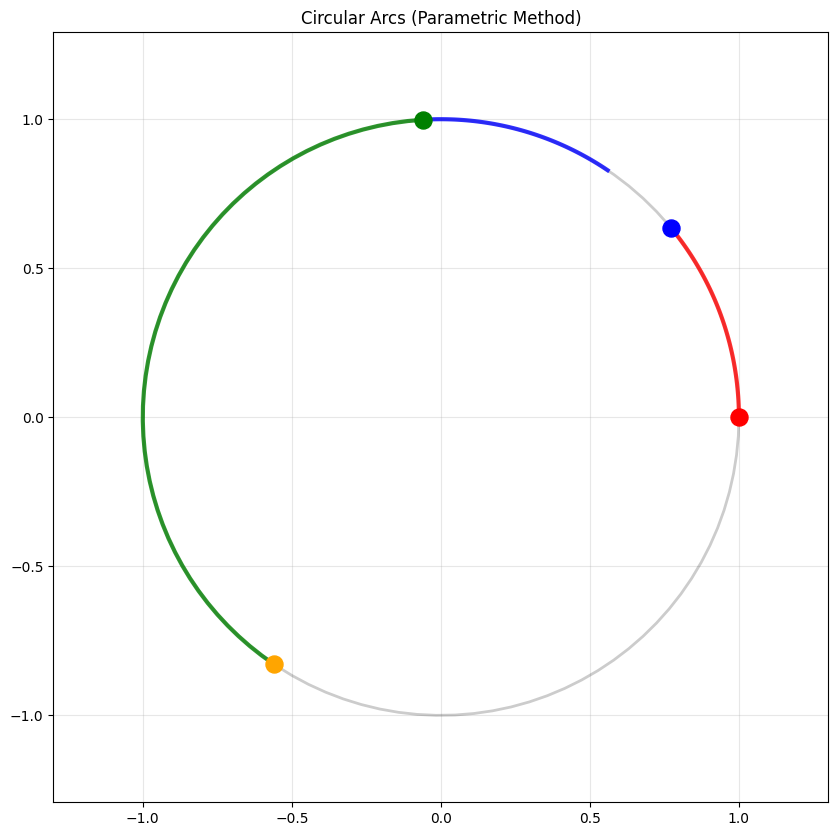

In [52]:
first = np.pi*np.random.rand(1)
second = first + (2*np.pi - first)*np.random.rand(1)
third = second + min(np.pi, 2*np.pi - second)*np.random.rand(1)
points = np.array([[0],first, second, third]).flatten()
angles_line = np.array(line_limits(points[0], points[1], points[2], points[3]))
print(angles_line*180/np.pi)
draw_circular_arcs_parametric(points, angles_line)